In [3]:
import cv2
import sys
from csv import writer
from time import time

delay = 1
window_name = "frame"
csvfile = "test.csv"

frame_width = 1440
y1 = 150
y2 = 400

y1_startPoint = (0, y1)
y1_endPoint = (frame_width, y1)

y2_startPoint = (0, y2)
y2_endPoint = (frame_width, y2)


###RGBカラー###
rgb_red = (255, 0, 0)
rgb_blue = (0, 255, 0)

###ビデオキャプチャ###
cap = cv2.VideoCapture("IMG_4001.mov") 

if not cap.isOpened():
    sys.exit()

###csv用意###
columns_name = ["time"]

for i in range(10):
    xyr = [f"x{i+1}", f"y{i+1}", f"r{i+1}"]
    columns_name.extend(xyr)

print(columns_name)

with open(csvfile, "a", newline='') as f:
    writer_object = writer(f)
    writer_object.writerow(columns_name)
    f.close()

with open("test2.csv","a",newline='') as f:
    writer_object = writer(f)
    writer_object.writerow(["time","x","y","r"])
    f.close()

###動画再生しながらデータの保存###
startTime = time()
while True:
    # フレームを取得
    ret, frame = cap.read()

    # 経過時間
    seconds = time() - startTime

    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=100, param2=60, minRadius=0, maxRadius=0)
        if circles is not None:
            for circle in circles:
                for x,y,r in circle:
                    frame = cv2.circle(frame, (int(x), int(y)), int(r), rgb_red, 3)

        #y1 の範囲を指定(青)
        frame = cv2.line(frame, pt1=y1_startPoint, pt2=y1_endPoint, color=rgb_blue)
        frame = cv2.putText(frame,
            text=f'{y1}',
            org=y1_startPoint,
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.0,
            color=rgb_blue,
            thickness=2,
            lineType=cv2.LINE_4)
        #y2の範囲を指定(赤)
        frame = cv2.line(frame, pt1=y2_startPoint, pt2=y2_endPoint, color=rgb_red)
        frame = cv2.putText(frame,
            text=f'{y2}',
            org=y2_startPoint,
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.0,
            color=rgb_red,
            thickness=2,
            lineType=cv2.LINE_4)
        cv2.imshow(window_name, frame)

        with open(csvfile, "a", newline='') as f:
            writer_object = writer(f)
            writer_object.writerow([seconds]+circle.flatten().tolist())
            f.close()

        with open("test2.csv", "a", newline='') as f:
            writer_object = writer(f)
            for k in circle:
                writer_object.writerow([seconds]+k.flatten().tolist())
            f.close()

        # フレームが取得できない場合はループを抜ける
        if cv2.waitKey(delay) & 0xFF == ord("q"):
            break
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)


# 動画オブジェクト解放
cv2.destroyWindow("frame")

['time', 'x1', 'y1', 'r1', 'x2', 'y2', 'r2', 'x3', 'y3', 'r3', 'x4', 'y4', 'r4', 'x5', 'y5', 'r5', 'x6', 'y6', 'r6', 'x7', 'y7', 'r7', 'x8', 'y8', 'r8', 'x9', 'y9', 'r9', 'x10', 'y10', 'r10']


In [4]:
import pandas as pd

df = pd.read_csv("test2.csv")
df

,time,x,y,r
0,0.058757,556.5,218.5,31.600000
1,0.058757,624.5,101.5,26.100000
2,0.152729,542.5,214.5,32.599998
3,0.223979,540.5,211.5,30.799999
4,0.223979,587.5,83.5,27.000000
...,...,...,...,...
1382,39.403979,571.5,230.5,31.900000
1383,39.403979,681.5,106.5,26.000000
1384,39.444631,560.5,221.5,33.599998
1385,39.487942,378.5,569.5,44.400002


In [7]:

circle1 = df[df.y > y2]

Text(0, 0.5, 'y-position (pixels)')

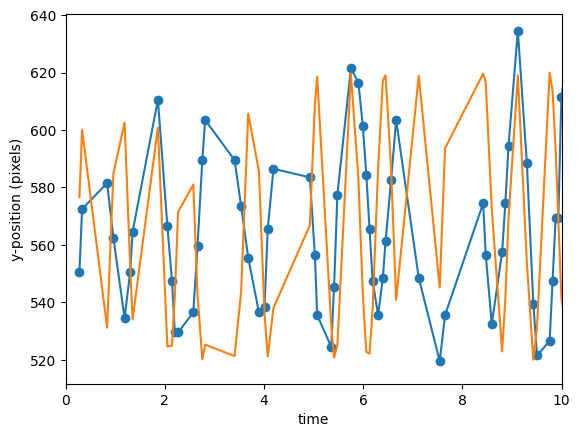

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(circle1.time, circle1.y)
plt.plot(circle1.time, circle1.y)
plt.plot(circle1.time, 50 * np.sin(np.pi * circle1.time * 3 + 3.8) + 570)
plt.xlim(0, 10)
plt.xlabel("time")
plt.ylabel("y-position (pixels)")